# Finding CVZ stars using astroquery.

In [12]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import BarycentricTrueEcliptic
from astropy import units as u
from astropy.coordinates import ICRS
from astroquery.mast import Catalogs

import lightkurve as lk

In [3]:
cvz = BarycentricTrueEcliptic(lon=0*u.deg, lat=-90*u.deg)
coords = cvz.transform_to(ICRS)

In [4]:
catalog_data = Catalogs.query_criteria(coordinates="{0} {1}".format(coords.ra.value, coords.dec.value),
                                       radius=.1, catalog="Tic", objType="STAR")
df = catalog_data.to_pandas()

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'KIC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'numcont' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'gaiaqflag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331

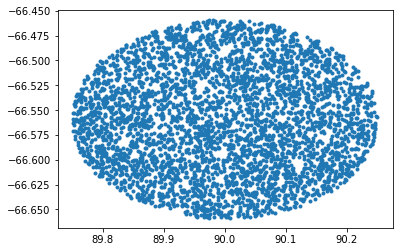

In [5]:
plt.plot(df.ra, df.dec, ".")

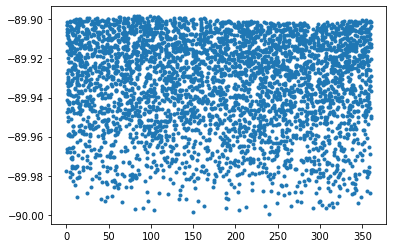

In [11]:
plt.plot(df.eclong, df.eclat, ".")

In [66]:
from tqdm import trange

for i in range(20):
    ticid = df.ID.values[i]
    print(ticid)
    starname = "TIC {}".format(ticid)
    lcf = lk.search_lightcurvefile(starname).download()
    try:
        lc = lcf.PDCSAP_FLUX
    except AttributeError:
        pass

No data found for target "TIC 31604252".
/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:131: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
No data found for target "TIC 31604267".
/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:131: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
No data found for target "TIC 31604281".
/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:131: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
No data found for target "TIC 31604285".
/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:131: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
No data found for target "TIC 31604329".
/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:131: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)
No data found for target "TIC 31604330".
/ana